In [4]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [5]:
# Load data
processed_data = joblib.load('../../data/processed/processed_data.joblib')

In [6]:
processed_data

{'X_train':        brittle_nails   bloody_stool   neck_pain   loss_of_balance  \
 3374               0              0           1                 1   
 1432               0              0           0                 0   
 3663               0              0           0                 0   
 3296               0              0           0                 0   
 3232               0              0           1                 0   
 ...              ...            ...         ...               ...   
 336                0              0           0                 0   
 2608               0              0           0                 0   
 2160               0              0           0                 0   
 1449               0              0           0                 0   
 3604               0              0           0                 0   
 
        abnormal_menstruation   burning_micturition   blackheads  \
 3374                       0                     0            0   
 1432      

In [19]:
processed_data['feature_names'] = [name.strip() for name in processed_data['feature_names']]

In [17]:
processed_data['X_train'].columns = [name.strip() for name in processed_data['X_train'].columns]

In [9]:
def analyze_symptom_correlations(X, feature_names):
    """Analyze correlations between symptoms"""
    corr_matrix = pd.DataFrame(X, columns=feature_names).corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Symptom Correlations')
    plt.tight_layout()
    plt.savefig('../../src/visualizations/symptom_correlations.png')
    
    return corr_matrix

In [10]:
def create_symptom_network(corr_matrix, threshold=0.3):
    """Create network graph of related symptoms"""
    G = nx.Graph()
    
    for i in range(len(corr_matrix)):
        for j in range(i+1, len(corr_matrix)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                G.add_edge(corr_matrix.index[i], 
                          corr_matrix.index[j], 
                          weight=abs(corr_matrix.iloc[i,j]))
    
    return G

In [11]:
def analyze_symptom_patterns():
    """Analyze common symptom patterns"""
    # Your analysis code here
    pass

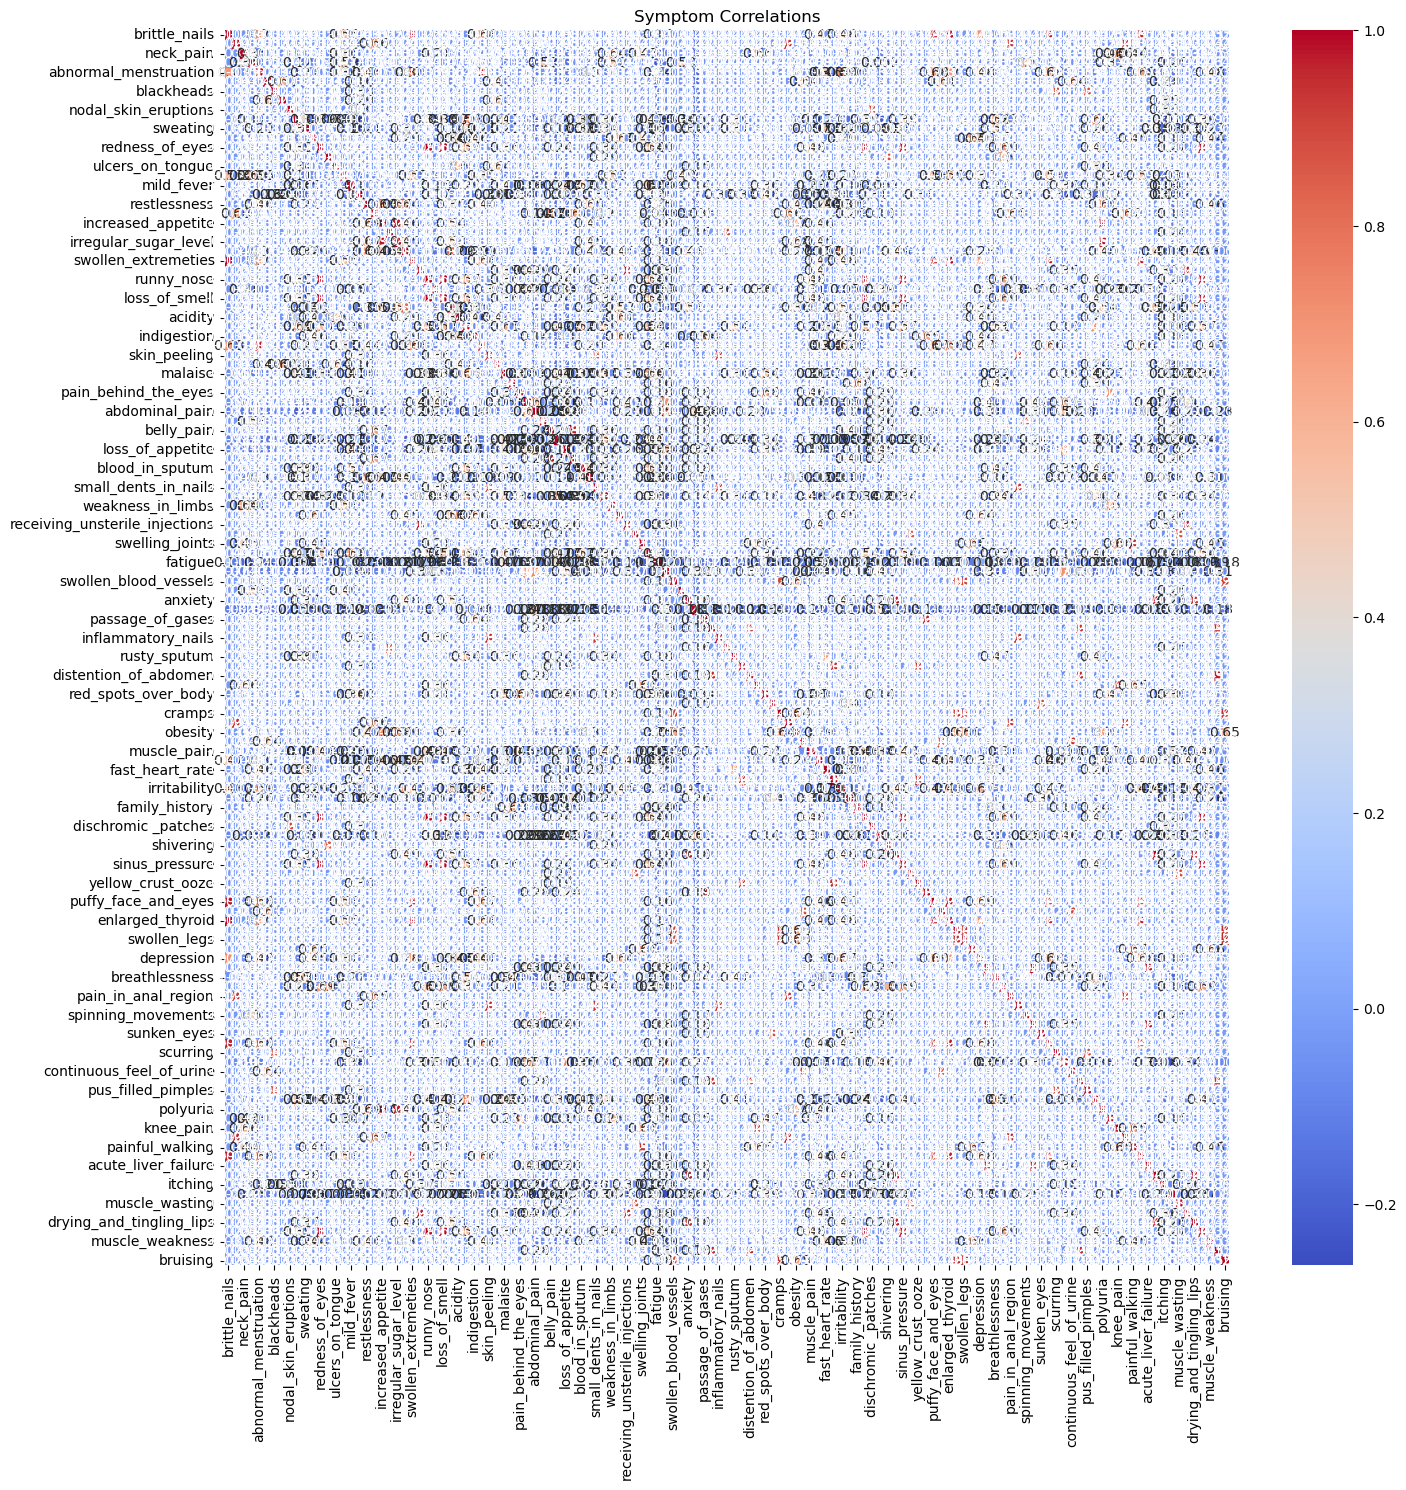

In [20]:
# Run analyses
corr_matrix = analyze_symptom_correlations(processed_data['X_train'], 
                                         processed_data['feature_names'])
symptom_network = create_symptom_network(corr_matrix)

In [21]:
# Save results
results = {
    'correlation_matrix': corr_matrix,
    'symptom_network': symptom_network
}

joblib.dump(results, '../../data/processed/symptom_analysis.joblib')

['../../data/processed/symptom_analysis.joblib']